In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

In [107]:
path1 = '../data_buenos/Loan_training_set_1_4.csv'
path2 = '../data_buenos/Loan_training_set_2_4.csv'
path3 = '../data_buenos/Loan_training_set_3_4.csv'
path4 = '../data_buenos/Loan_training_set_4_4.csv'

In [108]:
df1 = pd.read_csv(path1, skiprows = 1, sep = ',')

df1.drop(df1.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
df2 = pd.read_csv(path2, skiprows = 1, sep = ',')

df2.drop(df2.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
df3 = pd.read_csv(path3, skiprows = 1, sep = ',')

df3.drop(df3.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
df4 = pd.read_csv(path4, skiprows = 1, sep = ',')

df4.drop(df4.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
# concatenamos las tablas
df_g = pd.concat([df1, df2, df3, df4])

We want to check if there are duplicated values in our DataFrame, which contains all the data from the different 4 datasets loaded. To figure it out we will use _duplicated_ function of Python. 

In [113]:
duplicated = df_g[df_g.duplicated(keep = False)]

In [115]:
duplicated.count()

id                                            0
member_id                                     0
loan_amnt                                     0
funded_amnt                                   0
funded_amnt_inv                               0
term                                          0
int_rate                                      0
installment                                   0
grade                                         0
sub_grade                                     0
emp_title                                     0
emp_length                                    0
home_ownership                                0
annual_inc                                    0
verification_status                           0
issue_d                                       0
loan_status                                   0
pymnt_plan                                    0
url                                           0
desc                                          0
purpose                                 

We check that there are no duplicated values in our DataFrame, which is great.

In [96]:
df_g = df_g.drop(['acc_open_past_24mths', 
                  'dti',
                  'loan_amnt',
                  'total_pymnt',
                  'total_pymnt_inv',
                  'total_rec_int',
                  'total_rec_late_fee',
                  'total_rec_prncp',
                  'total_rev_hi_lim',
                  'chargeoff_within_12_mths',
                  'collection_recovery_fee',
                  'collections_12_mths_ex_med',
                  'debt_settlement_flag',
                  'delinq_2yrs',
                  'earliest_cr_line',
                  'funded_amnt_inv',
                  'id',
                  'inq_last_6mths',
                  'installment',
                  'issue_d',
                  'last_credit_pull_d',
                  'last_pymnt_amnt',
                  'last_pymnt_d',
                  'mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mths_since_recent_bc',
                  'mths_since_recent_inq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'open_acc',
                  'out_prncp',
                  'out_prncp_inv',
                  'policy_code',
                  'pub_rec_bankruptcies',
                  'recoveries',
                  'revol_bal',
                  'revol_util',
                  'tax_liens',
                  'term',
                  'total_il_high_credit_limit'], 
                 
                  axis='columns')

In [97]:
df = df_g.sample(n=500, random_state = 1789)
df.shape

(500, 101)

In [98]:
# eliminamos las variables con mas del 70% de obs con NaN
filtro_Nan = len(df) * .7
df.dropna(thresh = filtro_Nan, axis = 1, inplace = True)
df.shape

(500, 43)

In [36]:
#vemos el tipo de nuestras variables y la cantidad de NaN
df_typ = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('NaN_values').reset_index(),
                     df.dtypes.to_frame('types').reset_index(),
                     on = 'index',
                     how = 'inner')
df_typ

,index,NaN_values,types
0,funded_amnt,0,float64
1,hardship_flag,0,object
2,last_fico_range_low,0,float64
3,application_type,0,object
4,acc_now_delinq,0,float64
5,tot_coll_amt,0,float64
6,tot_cur_bal,0,float64
7,avg_cur_bal,0,float64
8,delinq_amnt,0,float64
9,mo_sin_rcnt_rev_tl_op,0,float64


In [37]:
# observamos los principales estaditicos de las variables 
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
funded_amnt,500.0,15209.600,9135.254,1000.0,7575.000,14000.0,21000.00,40000.0
annual_inc,500.0,75642.329,43505.337,5000.0,47000.000,65000.0,92327.25,325000.0
fico_range_low,500.0,695.280,31.585,660.0,670.000,690.0,711.25,835.0
fico_range_high,500.0,699.280,31.585,664.0,674.000,694.0,715.25,839.0
pub_rec,500.0,0.240,0.632,0.0,0.000,0.0,0.00,6.0
total_acc,500.0,25.018,12.682,4.0,16.000,22.0,32.00,72.0
last_fico_range_high,500.0,685.650,66.862,499.0,659.000,694.0,725.25,834.0
last_fico_range_low,500.0,673.730,106.294,0.0,655.000,690.0,721.25,830.0
acc_now_delinq,500.0,0.002,0.045,0.0,0.000,0.0,0.00,1.0
tot_coll_amt,500.0,297.512,2178.158,0.0,0.000,0.0,0.00,39660.0


In [99]:
def target(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0
    elif x == 'In Grace Period':
        return 0
    elif x == 'Late (31-120 days)':
        return 0
    elif x == 'Late (16-30 days)':
        return 0
    elif x == 'Current':
        return 2
    elif x == 'Default':
        return 0

In [100]:
df['loan_status'] = df.loan_status.map(target)
df.loan_status.unique()

array([2, 1, 0], dtype=int64)

In [101]:
df_impago = df[(df.loan_status == 1) | (df.loan_status == 0)]
df_impago.loan_status.unique()

array([1, 0], dtype=int64)

In [102]:
cuentas = pd.DataFrame({'observaciones' : df_impago['loan_status'].value_counts(),
                       'variable' : df_impago.loan_status.unique()}).sort_values(by = 'observaciones', ascending = False)
cuentas

,observaciones,variable
1,185,1
0,65,0


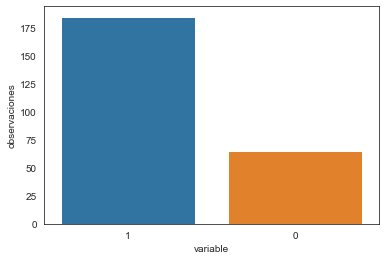

In [103]:
sns.barplot(x = cuentas.variable, y = cuentas.observaciones, order = cuentas.variable);

In [104]:
df_impago.drop(['url', 'funded_amnt'], axis = 'columns', inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [106]:
df_impago.shape

df_impago.loan_status.unique()

array([1, 0], dtype=int64)

In [107]:
df_n = df_impago.drop(['addr_state',
                       'application_type',
                       'disbursement_method',
                       'emp_length',
                       'loan_status',
                       'emp_title',
                       'grade',
                       'hardship_flag',
                       'home_ownership',
                       'initial_list_status',
                       'purpose',
                       'pymnt_plan',
                       'title',
                       'verification_status',
                       'sub_grade',
                       'zip_code'], axis = 1)

In [108]:
df_n.shape

(250, 25)

In [109]:
for variable in list(df_n.columns):
    print(variable + ' --> ' + str(df_n[variable].nunique()) + ' , data type '  + str(df_n[variable].dtype))

int_rate --> 95 , data type object
annual_inc --> 121 , data type float64
fico_range_low --> 26 , data type float64
fico_range_high --> 26 , data type float64
pub_rec --> 5 , data type float64
total_acc --> 51 , data type float64
last_fico_range_high --> 65 , data type float64
last_fico_range_low --> 65 , data type float64
acc_now_delinq --> 2 , data type float64
tot_coll_amt --> 43 , data type float64
tot_cur_bal --> 250 , data type float64
avg_cur_bal --> 249 , data type float64
bc_open_to_buy --> 237 , data type float64
bc_util --> 216 , data type float64
delinq_amnt --> 1 , data type float64
mo_sin_old_il_acct --> 136 , data type float64
mo_sin_rcnt_rev_tl_op --> 50 , data type float64
mort_acc --> 10 , data type float64
num_bc_sats --> 17 , data type float64
num_tl_120dpd_2m --> 1 , data type float64
pct_tl_nvr_dlq --> 86 , data type float64
percent_bc_gt_75 --> 31 , data type float64
tot_hi_cred_lim --> 247 , data type float64
total_bal_ex_mort --> 250 , data type float64
total_b

In [110]:
df_n.select_dtypes(include=['object'])

,int_rate
258948,7.89%
104679,13.59%
88237,14.49%
23570,8.67%
91000,17.57%
66744,7.99%
370306,18.25%
371852,14.65%
12078,20.99%
224027,6.62%


In [51]:
# df_n['term'] = df_n.term.str.split(' ').str[1].astype(int)
# df_n.term.head(5)

In [52]:
# df_n['revol_util'] = df_n.revol_util.str.strip('%').astype(float)
# df_n.revol_util.head(5)

In [111]:
df_n['int_rate'] = df_n.int_rate.str.strip('%').astype(float)
df_n.int_rate.head(5)

258948     7.89
104679    13.59
88237     14.49
23570      8.67
91000     17.57
Name: int_rate, dtype: float64

In [112]:
df_n.num_tl_120dpd_2m.unique()

array([ 0., nan])

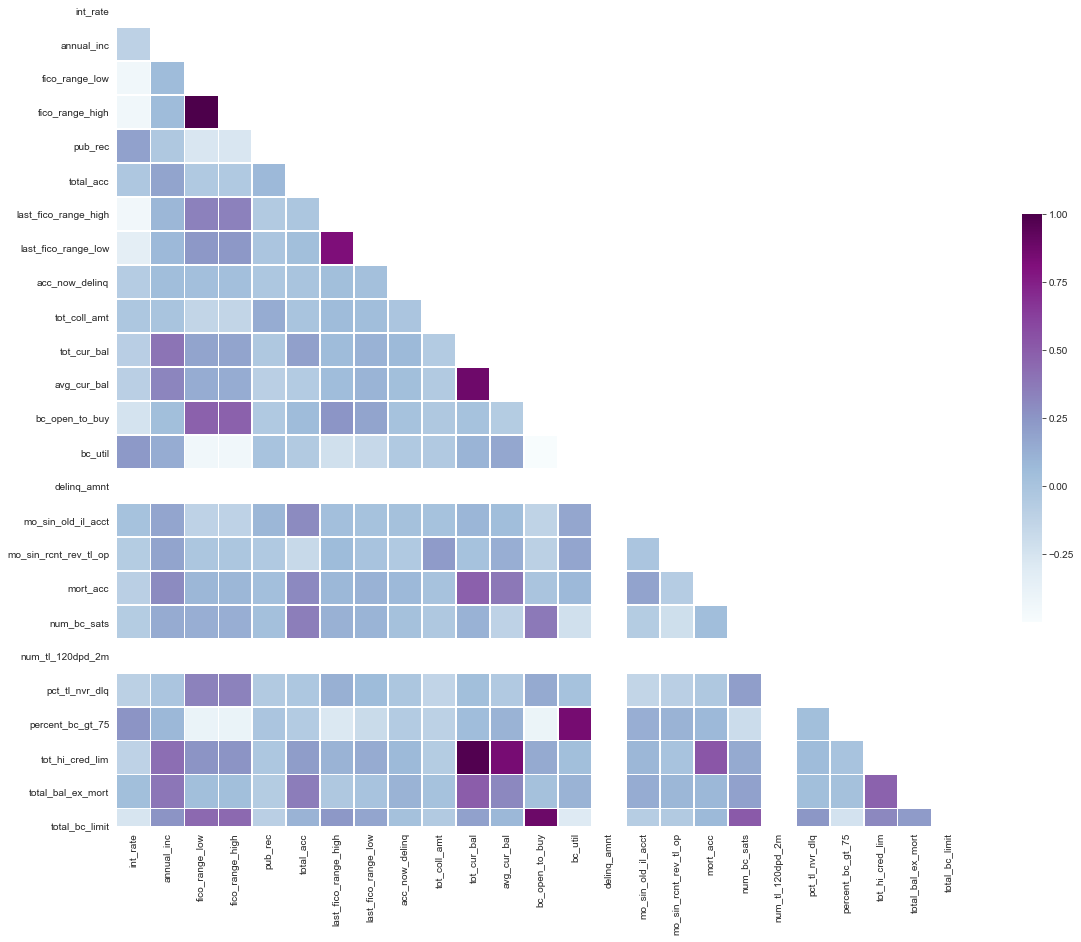

In [54]:
corr = df_n.corr()

mask = np.zeros_like(corr, dtype=np.bool) #para quitar la parte superior de la matriz 
mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'white') #para que no se vean los cuadrados que sobran 


f, ax = plt.subplots(figsize=(20, 15)) #dibujamos el lienzo 

# cmap = sns.diverging_palette(250, 700, as_cmap=True) #gama de colores que elegimos 

sns.heatmap(corr, mask=mask, cmap = 'BuPu', 
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax) ;  #es un grafico de mapa de calor

# cmap=sns.diverging_palette(250, 700, as_cmap=True), #No me coge la paleta (Marcos)

In [115]:
df_c = df_impago.loc[:,['addr_state',
                        'application_type',
                        'disbursement_method',
                        'emp_length',
                        'emp_title',
                        'grade',
                        'hardship_flag',
                        'home_ownership',
                        'initial_list_status',
                        'loan_status',
                        'purpose',
                        'pymnt_plan',
                        'title',
                        'verification_status',
                        'sub_grade',
                        'zip_code']]
# disbursement_method, earliest_cr_line, hardship_flag, initial_list_status, issue_d, last_credit_pull_d, 
# last_pymnt_d, policy_code, title, sub_grade, id, zip_code

In [116]:
# Nos quedamos solo con las categoricas que vamos a incluir en los modelos
df_c.drop(['addr_state',
           'disbursement_method',
           'initial_list_status',
           'title',
           'sub_grade',
           'emp_title',
           'zip_code'], axis = 'columns', inplace = True)

In [117]:
df_c.head(5)

,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
258948,Individual,10+ years,A,N,RENT,1,debt_consolidation,n,Not Verified
104679,Individual,10+ years,C,N,OWN,1,credit_card,n,Source Verified
88237,Individual,2 years,C,N,RENT,0,debt_consolidation,n,Verified
23570,Individual,10+ years,B,N,MORTGAGE,1,debt_consolidation,n,Not Verified
91000,Individual,2 years,D,N,RENT,0,small_business,n,Source Verified


In [118]:
df_c['application_type'] = df_c.application_type.map(lambda x: 0 if ( x == 'Individual')  else 1)

In [119]:
def años(x):
    if (x == '1 year') | (x == '2 years') | (x == '3 years') | (x == '4 years'):
        return 0
    elif (x == '5 year') | (x == '6 years') | (x == '7 years') | (x == '8 years') | (x == '9 years'):
        return 1
    elif x == '10+ years':
        return 2
#MARIO Y GON SOLO EN DOS 

We will consider NaN values as if borrowers have not ever worked. 

In [120]:
df_c['emp_length'] = df_c.emp_length.map(años)

df_c['emp_length'] = df_c.emp_length.fillna(0)

In [121]:
# recordar quitar esto desde arriba
# df_c.dropna(subset = ["emp_length"], inplace=True)

In [122]:
# df_c['emp_length'] = df_c.emp_length.astype(int)

In [123]:
# df_c['emp_length'] = df_c.emp_length.fillna(0)

In [124]:
df_c.emp_length.unique()

array([2., 0., 1.])

In [125]:
def riesgo(x):
    if (x == 'A') | (x == 'B') | (x == 'C'):
        return 0
    elif (x == 'D') | (x == 'E') | (x == 'F') | (x == 'G'):
        return 1

In [126]:
df_c['grade'] = df_c.grade.map(riesgo)

In [127]:
df_c.grade.unique()

array([0, 1], dtype=int64)

In [128]:
df_g.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY', 'NONE'], dtype=object)

In [129]:
def propiedad(x):
    if (x == 'OWN') | (x == 'MORTGAGE'):
        return 1
    else:
        return 0

In [130]:
df_c['home_ownership'] = df_c.home_ownership.map(propiedad)

In [131]:
df_c.home_ownership.unique()

array([0, 1], dtype=int64)

In [132]:
df_c.purpose.unique()

array(['debt_consolidation', 'credit_card', 'small_business',
       'home_improvement', 'other', 'major_purchase', 'medical', 'house',
       'moving'], dtype=object)

In [133]:
def proposito(x):
    if (x == 'small_business') | (x == 'debt_consolidation') | (x == 'major_purchase' ) | (x == 'medical'):
        return 0
    elif (x == 'credit_card') | (x == 'home_improvement') | (x == 'house') | (x == 'car'):
        return 1
    else:
        return 2

In [134]:
df_c['purpose'] = df_c.purpose.map(proposito)

In [135]:
df_c.purpose.unique()

array([0, 1, 2], dtype=int64)

In [136]:
df_c['pymnt_plan'] = df_c.pymnt_plan.map(lambda x: 0 if (x == 'n') else 1)

In [137]:
df_c.pymnt_plan.unique()

array([0, 1], dtype=int64)

In [138]:
df_c['verification_status'] = df_c.verification_status.map(lambda x: 0 if (x == 'Not Verified') else 1)

In [139]:
df_c.verification_status.unique()

array([0, 1], dtype=int64)

In [168]:
df_c['hardship_flag'] = df_c.hardship_flag.map(lambda x: 0 if (x == 'N') else 1)

In [170]:
df_c['hardship_flag'].unique()

array([0, 1], dtype=int64)

In [171]:
df_c.head(5)

,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
258948,0,2,0,0,0,1,0,0,0
104679,0,2,0,0,1,1,1,0,1
88237,0,0,0,0,0,0,0,0,1
23570,0,2,0,0,1,1,0,0,0
91000,0,0,1,0,0,0,0,0,1


### Estandarizamos e imputamos por la media/mediana los valores de las variables numéricas que vamos a utilizar

In [353]:
# X = df_n.drop('loan_status', axis=1)
# y = df_n['loan_status']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [354]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

In [355]:
# numeric_features = df_n.select_dtypes(include=['int64', 'float64']).columns

# from sklearn.compose import ColumnTransformer

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features)])

In [356]:
# from sklearn.ensemble import RandomForestClassifier

# rf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', RandomForestClassifier())])

In [172]:
df_n.shape

df_c.shape

(250, 9)

In [173]:
df_c = df_c.astype('object')

In [174]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 258948 to 43807
Data columns (total 9 columns):
application_type       250 non-null object
emp_length             250 non-null object
grade                  250 non-null object
hardship_flag          250 non-null object
home_ownership         250 non-null object
loan_status            250 non-null object
purpose                250 non-null object
pymnt_plan             250 non-null object
verification_status    250 non-null object
dtypes: object(9)
memory usage: 19.5+ KB


In [175]:
df_c.loan_status.unique()

array([1, 0], dtype=object)

In [176]:
df_unido = pd.DataFrame(pd.concat([df_n, df_c], axis = 1))

In [177]:
df_unido.head(12)

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,...,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
258948,7.89,96000.0,675.0,679.0,0.0,21.0,744.0,740.0,0.0,0.0,...,16800.0,0,2,0,0,0,1,0,0,0
104679,13.59,97000.0,675.0,679.0,0.0,15.0,739.0,735.0,0.0,0.0,...,23900.0,0,2,0,0,1,1,1,0,1
88237,14.49,300000.0,665.0,669.0,1.0,16.0,629.0,625.0,0.0,0.0,...,50000.0,0,0,0,0,0,0,0,0,1
23570,8.67,115000.0,670.0,674.0,0.0,20.0,694.0,690.0,0.0,145.0,...,4500.0,0,2,0,0,1,1,0,0,0
91000,17.57,32000.0,710.0,714.0,0.0,9.0,499.0,0.0,0.0,0.0,...,8000.0,0,0,1,0,0,0,0,0,1
66744,7.99,36000.0,755.0,759.0,0.0,18.0,704.0,700.0,0.0,0.0,...,6200.0,0,0,0,0,0,1,0,0,0
370306,18.25,54800.0,660.0,664.0,0.0,37.0,579.0,575.0,0.0,0.0,...,32300.0,0,0,1,0,1,0,1,0,1
371852,14.65,20000.0,680.0,684.0,0.0,12.0,659.0,655.0,0.0,0.0,...,4800.0,0,0,0,0,0,1,0,0,0
12078,20.99,9000.0,700.0,704.0,0.0,6.0,729.0,725.0,0.0,0.0,...,3300.0,0,0,1,0,1,1,1,0,1
224027,6.62,90000.0,725.0,729.0,0.0,37.0,724.0,720.0,0.0,0.0,...,68800.0,0,1,0,0,1,1,0,0,0


In [178]:
# df_unido.loan_status

In [179]:
X = df_unido.drop('loan_status', axis=1)
y = df_unido['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [180]:
# X_train.shape
# X_test.shape

y_train = pd.DataFrame(y_train) #Para que salgan bien (no deja hacer reshape en series)

y_test = pd.DataFrame(y_test)

In [181]:
# y_train.shape
y_test.shape
X_train.shape

(200, 33)

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [183]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='999'))])    
categorical_features = X_train.select_dtypes(include=['object']).columns

In [184]:
numeric_transformer

Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [185]:
numeric_features = df_unido.select_dtypes(include=['int64', 'float64','int32']).columns

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [186]:
preprocessor.fit_transform(X_train)

array([[-0.5167215421800357, -0.8008445589412766, 0.3484972541664789,
        ..., 1, 0, 0],
       [0.9025290777121169, -0.31987968529576827, -1.0548473934837774,
        ..., 0, 0, 1],
       [0.4797735739144542, -0.9210857773526537, -1.0548473934837774,
        ..., 1, 0, 1],
       ...,
       [1.8558858770925593, 0.5458570872661468, 1.1281331695277326, ...,
        0, 0, 1],
       [-0.08533837503956382, -0.38240511886968437, 0.0366428880219775,
        ..., 0, 0, 1],
       [-1.586551796688406, -0.12749373583756496, 2.531477817177989, ...,
        0, 0, 0]], dtype=object)

In [187]:
categorical_features

Index(['application_type', 'emp_length', 'grade', 'hardship_flag',
       'home_ownership', 'purpose', 'pymnt_plan', 'verification_status'],
      dtype='object')

In [188]:
pd.DataFrame(preprocessor.fit_transform(df_unido), columns = X_train.columns)

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,...,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,purpose,pymnt_plan,verification_status
0,-1.18525,0.572087,-0.58305,-0.58305,-0.378095,-0.43417,0.89275,0.618961,-0.0633724,-0.150521,...,-0.22382,-0.204459,0,2,0,0,0,0,0,0
1,0.0378782,0.596922,-0.58305,-0.58305,-0.378095,-0.916938,0.829127,0.582975,-0.0633724,-0.150521,...,-0.618212,0.0860763,0,2,0,0,1,1,0,1
2,0.231003,5.63831,-0.913202,-0.913202,1.17148,-0.836477,-0.570566,-0.20872,-0.0633724,-0.150521,...,1.3997,1.1541,0,0,0,0,0,0,0,1
3,-1.01787,1.04394,-0.748126,-0.748126,-0.378095,-0.514631,0.256526,0.2591,-0.0633724,-0.0991556,...,-0.771934,-0.707782,0,2,0,0,1,0,0,0
4,0.891919,-1.01732,0.572485,0.572485,-0.378095,-1.39971,-2.22475,-4.70699,-0.0633724,-0.150521,...,-0.676471,-0.56456,0,0,1,0,0,0,0,1
5,-1.16379,-0.917978,2.05817,2.05817,-0.378095,-0.675554,0.38377,0.331072,-0.0633724,-0.150521,...,-0.323934,-0.638217,0,0,0,0,0,0,0,0
6,1.03784,-0.451091,-1.07828,-1.07828,-0.378095,0.853213,-1.20679,-0.568581,-0.0633724,-0.150521,...,-0.0507331,0.429809,0,0,1,0,1,1,0,1
7,0.265336,-1.31533,-0.417973,-0.417973,-0.378095,-1.15832,-0.188831,0.00719723,-0.0633724,-0.150521,...,-0.384391,-0.695506,0,0,0,0,0,0,0,0
8,1.62579,-1.58851,0.242332,0.242332,-0.378095,-1.64109,0.701883,0.511003,-0.0633724,-0.150521,...,-0.941574,-0.756887,0,0,1,0,1,1,0,1
9,-1.45777,0.423081,1.06771,1.06771,-0.378095,0.853213,0.63826,0.475017,-0.0633724,-0.150521,...,0.36041,1.92341,0,1,0,0,1,0,0,0


In [189]:
X_train.columns

Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'application_type', 'emp_length',
       'grade', 'hardship_flag', 'home_ownership', 'purpose', 'pymnt_plan',
       'verification_status'],
      dtype='object')

In [190]:
df_unido_escalado = pd.DataFrame(preprocessor.fit_transform(df_unido), columns = X_train.columns)

In [191]:
round(df_unido_escalado.describe(), 2)

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,...,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,purpose,pymnt_plan,verification_status
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,...,250.00,250.00,250,250.0,250,250,250,250,250,250
unique,95.00,121.00,26.00,26.00,5.00,51.00,65.00,65.00,2.00,43.00,...,250.00,188.00,2,3.0,2,2,2,3,2,2
top,0.89,0.17,-1.08,-1.08,-0.38,-0.76,0.07,0.48,-0.06,-0.15,...,-1.03,-0.71,0,0.0,0,0,1,0,0,1
freq,10.00,12.00,34.00,34.00,209.00,12.00,13.00,13.00,249.00,208.00,...,1.00,7.00,249,120.0,178,249,141,167,249,184


In [192]:
df_unido_escalado.to_csv("../data_buenos/df_unido_escalado.csv")

In [193]:
# X_train.to_csv("../data_buenos/X_train.csv")

In [194]:
# X_test.to_csv("../data_buenos/X_test.csv")
y_train.to_csv("../data_buenos/Y_train.csv")
y_test.to_csv("../data_buenos/Y_test.csv")

In [195]:
X = df_unido.drop('loan_status', axis=1)
y = df_unido['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_unido_escalado, test_size=0.2)

In [197]:
X_train.shape

(200, 33)

In [198]:
X_train.to_csv("../data_buenos/X_train.csv")
X_test.to_csv("../data_buenos/X_test.csv")

In [199]:
df_unido_escalado

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,...,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,purpose,pymnt_plan,verification_status
0,-1.18525,0.572087,-0.58305,-0.58305,-0.378095,-0.43417,0.89275,0.618961,-0.0633724,-0.150521,...,-0.22382,-0.204459,0,2,0,0,0,0,0,0
1,0.0378782,0.596922,-0.58305,-0.58305,-0.378095,-0.916938,0.829127,0.582975,-0.0633724,-0.150521,...,-0.618212,0.0860763,0,2,0,0,1,1,0,1
2,0.231003,5.63831,-0.913202,-0.913202,1.17148,-0.836477,-0.570566,-0.20872,-0.0633724,-0.150521,...,1.3997,1.1541,0,0,0,0,0,0,0,1
3,-1.01787,1.04394,-0.748126,-0.748126,-0.378095,-0.514631,0.256526,0.2591,-0.0633724,-0.0991556,...,-0.771934,-0.707782,0,2,0,0,1,0,0,0
4,0.891919,-1.01732,0.572485,0.572485,-0.378095,-1.39971,-2.22475,-4.70699,-0.0633724,-0.150521,...,-0.676471,-0.56456,0,0,1,0,0,0,0,1
5,-1.16379,-0.917978,2.05817,2.05817,-0.378095,-0.675554,0.38377,0.331072,-0.0633724,-0.150521,...,-0.323934,-0.638217,0,0,0,0,0,0,0,0
6,1.03784,-0.451091,-1.07828,-1.07828,-0.378095,0.853213,-1.20679,-0.568581,-0.0633724,-0.150521,...,-0.0507331,0.429809,0,0,1,0,1,1,0,1
7,0.265336,-1.31533,-0.417973,-0.417973,-0.378095,-1.15832,-0.188831,0.00719723,-0.0633724,-0.150521,...,-0.384391,-0.695506,0,0,0,0,0,0,0,0
8,1.62579,-1.58851,0.242332,0.242332,-0.378095,-1.64109,0.701883,0.511003,-0.0633724,-0.150521,...,-0.941574,-0.756887,0,0,1,0,1,1,0,1
9,-1.45777,0.423081,1.06771,1.06771,-0.378095,0.853213,0.63826,0.475017,-0.0633724,-0.150521,...,0.36041,1.92341,0,1,0,0,1,0,0,0


In [5]:
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE

In [98]:
X_train_balanced = pd.read_csv("../data_buenos/X_train.csv")
Y_train_balanced = pd.read_csv("../data_buenos/y_train.csv")

In [101]:
X_train_balanced.drop(["Unnamed: 0"], axis= "columns", inplace= True)
Y_train_balanced.drop(["Unnamed: 0"], axis= "columns", inplace= True)

In [82]:
ADASYN?

In [102]:
# sm = SMOTE(random_state = 42)

sm_adasyn = ADASYN(sampling_strategy = 0.65, random_state = 42)

X_sm, y_sm = sm_adasyn.fit_sample(X_train_balanced, Y_train_balanced)

C:\Users\Barra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
y_sm = pd.DataFrame(y_sm)

X_sm = pd.DataFrame(X_sm)

In [104]:
# X_sm

print(y_sm[y_sm == 1].count())
y_sm[y_sm == 0].count()

0    151
dtype: int64


0    98
dtype: int64

In [105]:
X_sm

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.747496,-0.073607,1.893096,1.893096,-0.378095,-1.238783,1.910709,1.194739,-0.063372,-0.150521,...,-0.512060,0.380704,0.0,2.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000
1,0.121566,0.050565,0.077256,0.077256,-0.378095,1.014135,0.511015,0.403045,-0.063372,-0.150521,...,1.136400,-0.073514,0.0,2.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,3.771624,0.476798,0.572485,0.572485,-0.378095,-0.675554,-0.761433,-0.316678,-0.063372,-0.150521,...,-0.026601,-0.556376,0.0,2.000000,1.000000,0.0,0.000000,0.000000,0.0,1.000000
3,-0.017913,-0.843474,-0.087821,-0.087821,-0.378095,-0.756015,1.338107,0.870864,-0.063372,-0.150521,...,-0.128450,-0.454075,0.0,2.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
4,-0.700288,0.190631,1.067714,1.067714,-0.378095,-0.434170,0.574638,0.439031,-0.063372,-0.150521,...,-0.282658,-0.012133,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.0,1.000000
5,-0.520038,-0.570296,-0.087821,-0.087821,-0.378095,-1.480168,0.892750,0.618961,-0.063372,-0.082860,...,-1.098304,0.532110,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000
6,-0.520038,-0.818640,0.407408,0.407408,-0.378095,-1.480168,1.147240,0.762906,-0.063372,-0.150521,...,-0.496720,-0.400878,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.000000
7,-0.090872,1.168113,-0.913202,-0.913202,-0.378095,0.048599,0.638260,0.475017,-0.063372,-0.150521,...,-0.281269,-0.441799,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000
8,-0.013622,-0.694468,-0.913202,-0.913202,-0.378095,1.335981,0.383770,0.331072,-0.063372,-0.150521,...,-0.747479,-0.646401,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000
9,-0.423475,1.093610,0.737561,0.737561,-0.378095,-1.077861,0.638260,0.475017,-0.063372,-0.150521,...,-0.697248,0.532110,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000


In [99]:
X_train_balanced

,Unnamed: 0,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,...,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,purpose,pymnt_plan,verification_status
0,211,-0.747496,-0.073607,1.893096,1.893096,-0.378095,-1.238783,1.910709,1.194739,-0.063372,...,-0.512060,0.380704,0,2.0,0,0,1,0,0,0
1,37,0.121566,0.050565,0.077256,0.077256,-0.378095,1.014135,0.511015,0.403045,-0.063372,...,1.136400,-0.073514,0,2.0,0,0,0,0,0,0
2,116,3.771624,0.476798,0.572485,0.572485,-0.378095,-0.675554,-0.761433,-0.316678,-0.063372,...,-0.026601,-0.556376,0,2.0,1,0,0,0,0,1
3,113,-0.017913,-0.843474,-0.087821,-0.087821,-0.378095,-0.756015,1.338107,0.870864,-0.063372,...,-0.128450,-0.454075,0,2.0,0,0,0,0,0,1
4,115,-0.700288,0.190631,1.067714,1.067714,-0.378095,-0.434170,0.574638,0.439031,-0.063372,...,-0.282658,-0.012133,0,0.0,0,0,1,1,0,1
5,125,-0.520038,-0.570296,-0.087821,-0.087821,-0.378095,-1.480168,0.892750,0.618961,-0.063372,...,-1.098304,0.532110,0,0.0,0,0,0,1,0,1
6,29,-0.520038,-0.818640,0.407408,0.407408,-0.378095,-1.480168,1.147240,0.762906,-0.063372,...,-0.496720,-0.400878,0,0.0,0,0,1,1,0,0
7,185,-0.090872,1.168113,-0.913202,-0.913202,-0.378095,0.048599,0.638260,0.475017,-0.063372,...,-0.281269,-0.441799,0,1.0,0,0,1,0,0,1
8,207,-0.013622,-0.694468,-0.913202,-0.913202,-0.378095,1.335981,0.383770,0.331072,-0.063372,...,-0.747479,-0.646401,0,1.0,0,0,0,1,0,0
9,236,-0.423475,1.093610,0.737561,0.737561,-0.378095,-1.077861,0.638260,0.475017,-0.063372,...,-0.697248,0.532110,0,0.0,0,0,0,0,0,1
